# Import Required Libraries

In [52]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [53]:
#Lloguers#####################################################################################################
#Merge the data
'''
# Load Data
file1_path = './portal_dades_bcn_ajuntament/bcn_lloguer_preuperm2_2014_2024.csv'
file2_path = './portal_dades_bcn_ajuntament/bcn_lloguer_preutotal_2014_2024.csv'
price_per_m2_df = pd.read_csv(file1_path)
total_rent_price_df = pd.read_csv(file2_path)
# Reshape Data from Wide to Long Format
price_per_m2_df = price_per_m2_df.melt(id_vars=['Territori', 'Tipus de territori'], var_name='year', value_name='price_per_m2')
total_rent_price_df = total_rent_price_df.melt(id_vars=['Territori', 'Tipus de territori'], var_name='year', value_name='total_rent_price')
# Convert 'year' column to integer
price_per_m2_df['year'] = price_per_m2_df['year'].astype(int)
total_rent_price_df['year'] = total_rent_price_df['year'].astype(int)
# Filter Data to Remove Rows from 2013 (included) until 2000
price_per_m2_df = price_per_m2_df[price_per_m2_df['year'] > 2013]
total_rent_price_df = total_rent_price_df[total_rent_price_df['year'] > 2013]
# Merge DataFrames
lloguer_df = pd.merge(price_per_m2_df, total_rent_price_df, on=['Territori', 'Tipus de territori', 'year'], suffixes=('_per_m2', '_total'))
# Display the first few rows of the merged DataFrame to inspect the result
print(lloguer_df.head())
# Save Merged Data
lloguer_df.to_csv('./portal_dades_bcn_ajuntament/merged_rent_prices_2014_2024.csv', index=False)
'''
lloguer_df = './portal_dades_bcn_ajuntament/merged_rent_prices_2014_2024.csv'
lloguer_df = pd.read_csv(lloguer_df)
print(lloguer_df.head())

        Territori Tipus de territori  year  price_per_m2  total_rent_price
0       Barcelona           Municipi  2014         10.16            688.23
1    Ciutat Vella          Districte  2014         11.38            639.11
2        el Raval              Barri  2014         10.47            577.85
3  el Barri Gòtic              Barri  2014         10.54            749.99
4  la Barceloneta              Barri  2014         15.15            563.08


In [54]:
#Compraventa#####################################################################################################
#Merge the data
'''
# Load Data
file1_path = './portal_dades_bcn_ajuntament/bcn_preutotal_2014_2024.csv'
file2_path = './portal_dades_bcn_ajuntament/bcn_preuperm2_2014_2024.csv'
price_per_m2_df = pd.read_csv(file1_path)
total_sale_price_df = pd.read_csv(file2_path)
# Reshape Data from Wide to Long Format
price_per_m2_df = price_per_m2_df.melt(id_vars=['Territori', 'Tipus de territori'], var_name='year', value_name='total_sale_price')
total_sale_price_df = total_sale_price_df.melt(id_vars=['Territori', 'Tipus de territori'], var_name='year', value_name='price_per_m2')
# Convert 'year' column to integer
price_per_m2_df['year'] = price_per_m2_df['year'].astype(int)
total_sale_price_df['year'] = total_sale_price_df['year'].astype(int)
# Filter Data to Remove Rows from 2013 (included) until 2000
price_per_m2_df = price_per_m2_df[price_per_m2_df['year'] > 2013]
total_sale_price_df = total_sale_price_df[total_sale_price_df['year'] > 2013]
# Merge DataFrames
compraventa = pd.merge(price_per_m2_df, total_sale_price_df, on=['Territori', 'Tipus de territori', 'year'], suffixes=('_total', '_per_m2'))
# Display the first few rows of the merged DataFrame to inspect the result
print(compraventa.head())
# Save Merged Data
compraventa.to_csv('./portal_dades_bcn_ajuntament/merged_sale_prices_2014_2024.csv', index=False)
'''
compraventa = './portal_dades_bcn_ajuntament/merged_sale_prices_2014_2024.csv'
compraventa = pd.read_csv(compraventa)
print(compraventa.head())

        Territori Tipus de territori  year  total_sale_price  price_per_m2
0       Barcelona           Municipi  2014         212220.89       2304.15
1    Ciutat Vella          Districte  2014         162392.35       2383.56
2        el Raval              Barri  2014         111197.24       1807.06
3  el Barri Gòtic              Barri  2014         262301.47       2715.61
4  la Barceloneta              Barri  2014         135337.22       3130.85


# Inspect Data

In [55]:
# Filter data where Tipus de territori is 'Districte'
lloguer_district_df = lloguer_df[lloguer_df['Tipus de territori'] == 'Districte']
compraventa_district_df = compraventa[compraventa['Tipus de territori'] == 'Districte']
# Function to plot evolution of prices
def plot_evolution(df, price_column, title):
    districts = df['Territori'].unique()
    plt.figure(figsize=(10, 5))
    for district in districts:
        district_df = df[df['Territori'] == district]
        plt.plot(district_df['year'], district_df[price_column], label=district)
    plt.xlabel('Year')
    plt.ylabel(price_column)
    plt.title(title)
    plt.legend()
    plt.show()

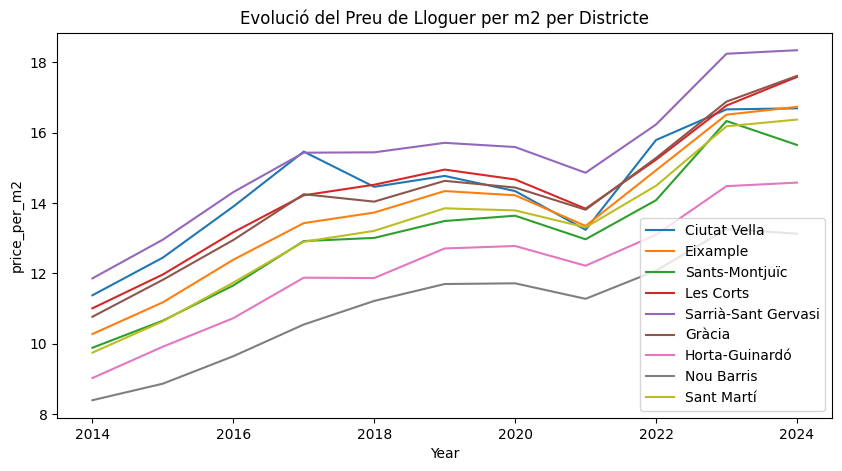

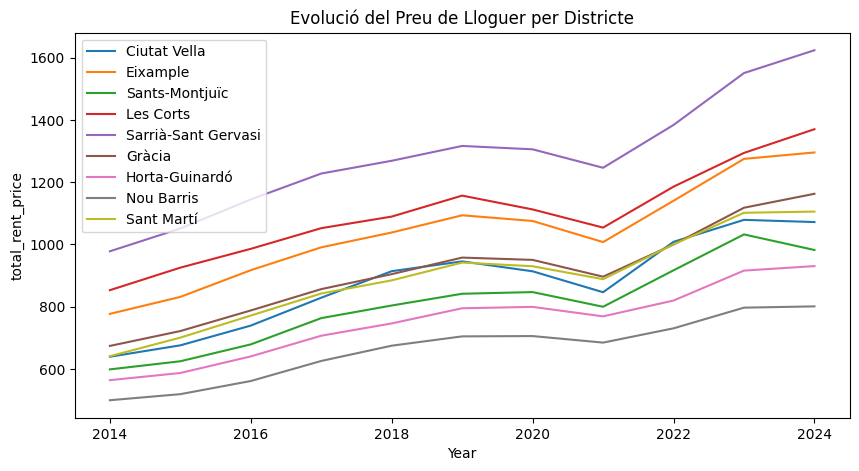

In [56]:
#Plots preus de lloguer////////////////////////////////////////////////////////////////////////////////////////////////////////
plot_evolution(lloguer_district_df, 'price_per_m2', 'Evolució del Preu de Lloguer per m2 per Districte')
plot_evolution(lloguer_district_df, 'total_rent_price', 'Evolució del Preu de Lloguer per Districte')

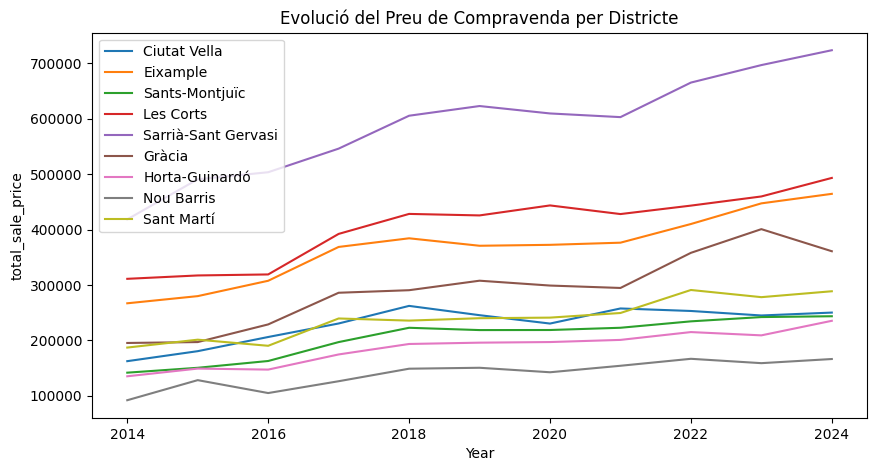

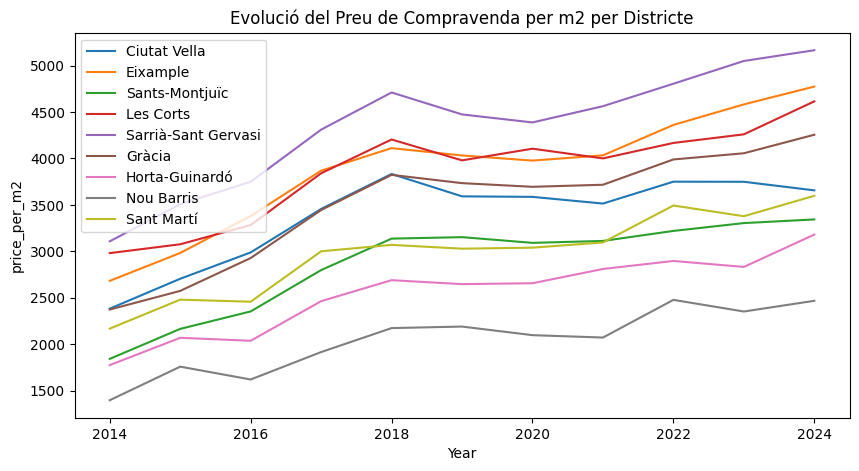

In [57]:
plot_evolution(compraventa_district_df, 'total_sale_price', 'Evolució del Preu de Compravenda per Districte')
plot_evolution(compraventa_district_df, 'price_per_m2', 'Evolució del Preu de Compravenda per m2 per Districte')

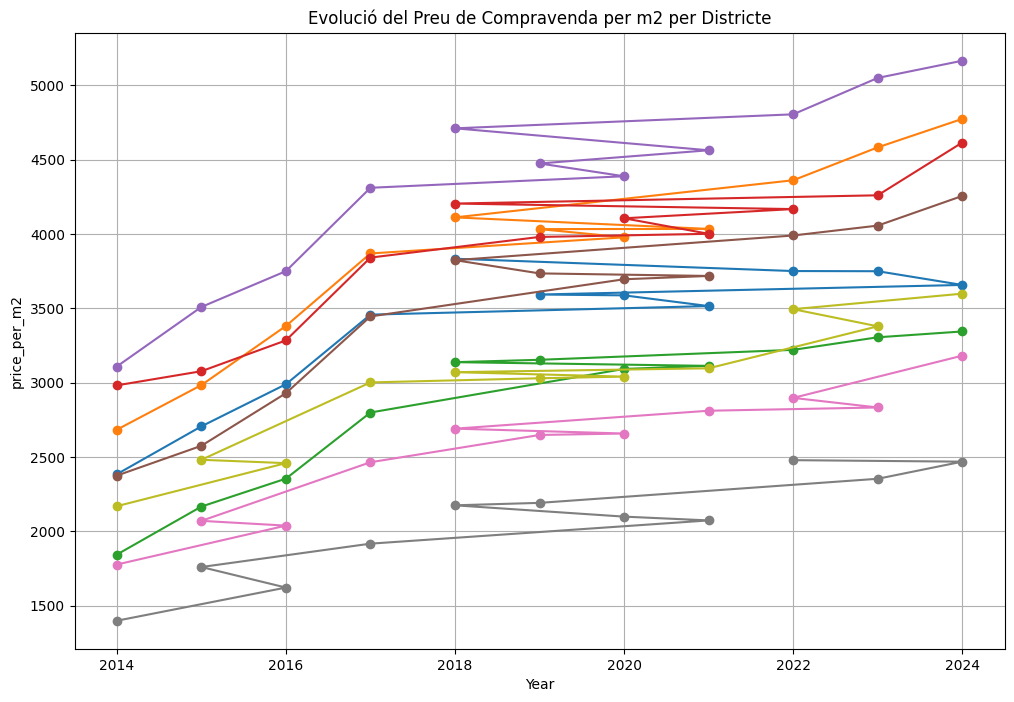

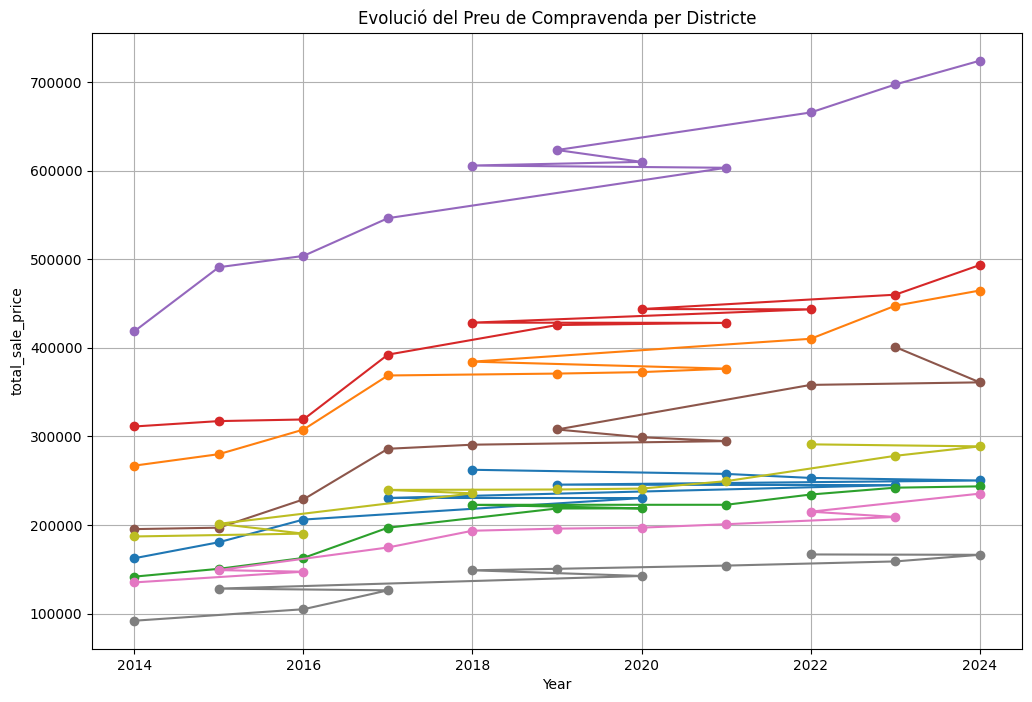

In [58]:

# Function to plot evolution of prices with fixed y-axis limits
def plot_evolution_line(df, price_column, title):
    districts = df['Territori'].unique()
    plt.figure(figsize=(12, 8))
    for district in districts:
        #district_df should be sorted for all districts
        district_df = df[df['Territori'] == district].sort_values(by=price_column)
        plt.plot(district_df['year'], district_df[price_column], label=district, marker='o')
    plt.xlabel('Year')
    plt.ylabel(price_column)
    plt.title(title)
    #plt.legend()
    plt.grid(True)
    plt.show()

# Plot the data with fixed y-axis limits
plot_evolution_line(compraventa_district_df, 'price_per_m2', 'Evolució del Preu de Compravenda per m2 per Districte')
plot_evolution_line(compraventa_district_df, 'total_sale_price', 'Evolució del Preu de Compravenda per Districte')

Model Creation

In [59]:
#%pip install prophet
#pip install cmdstanpy
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [60]:
import cmdstanpy
print(cmdstanpy.__version__)

1.2.4


21:02:49 - cmdstanpy - INFO - Chain [1] start processing
21:02:49 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\oriol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


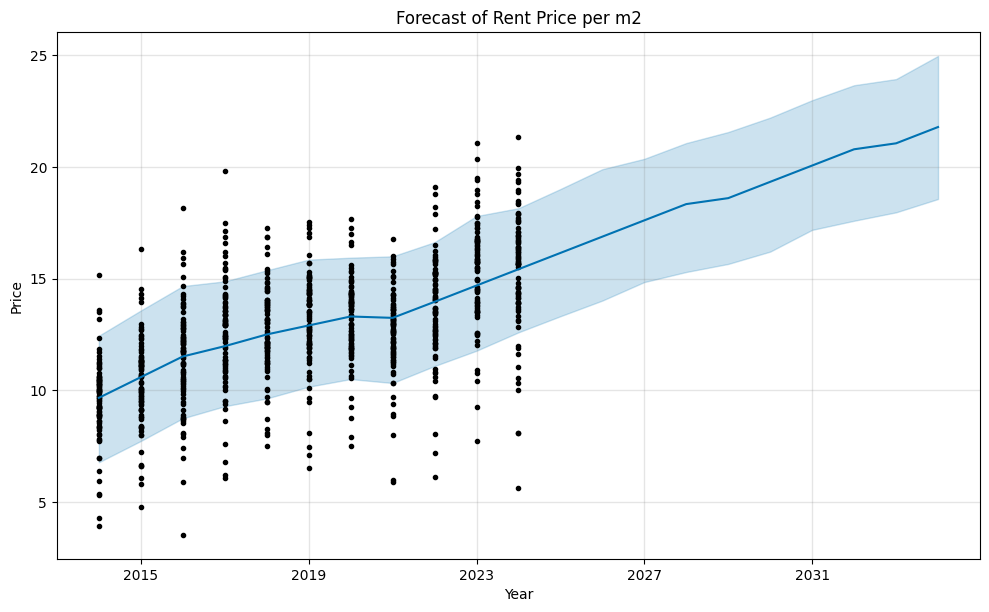

21:02:50 - cmdstanpy - INFO - Chain [1] start processing
21:02:50 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\oriol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


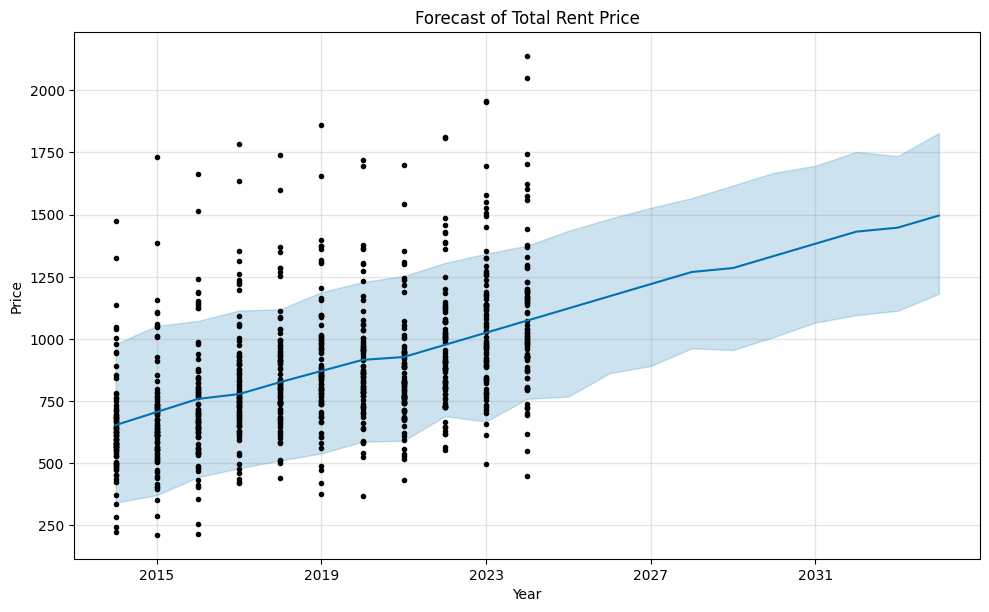

21:02:50 - cmdstanpy - INFO - Chain [1] start processing
21:02:50 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\oriol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


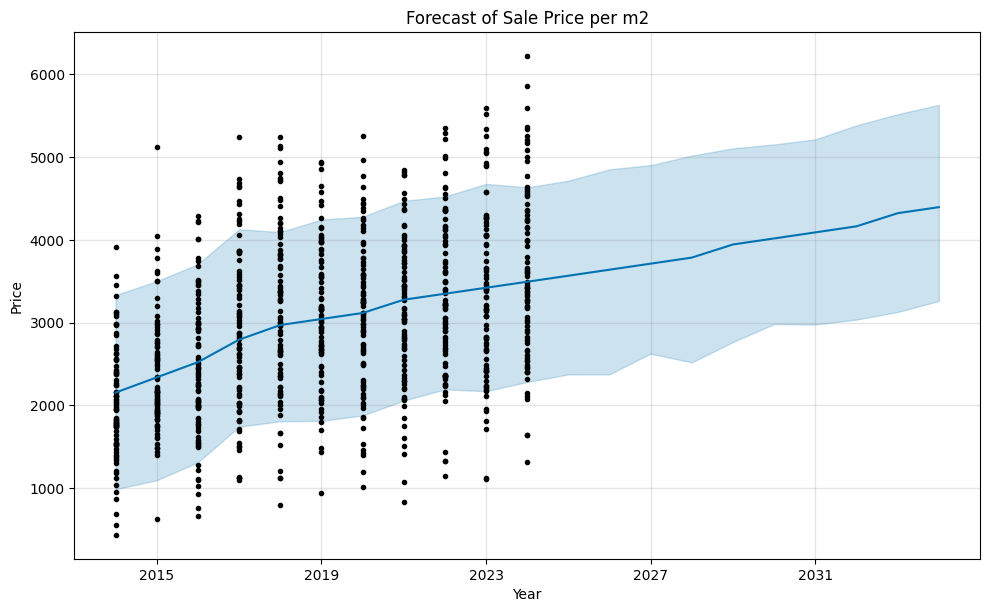

21:02:51 - cmdstanpy - INFO - Chain [1] start processing
21:02:51 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\oriol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


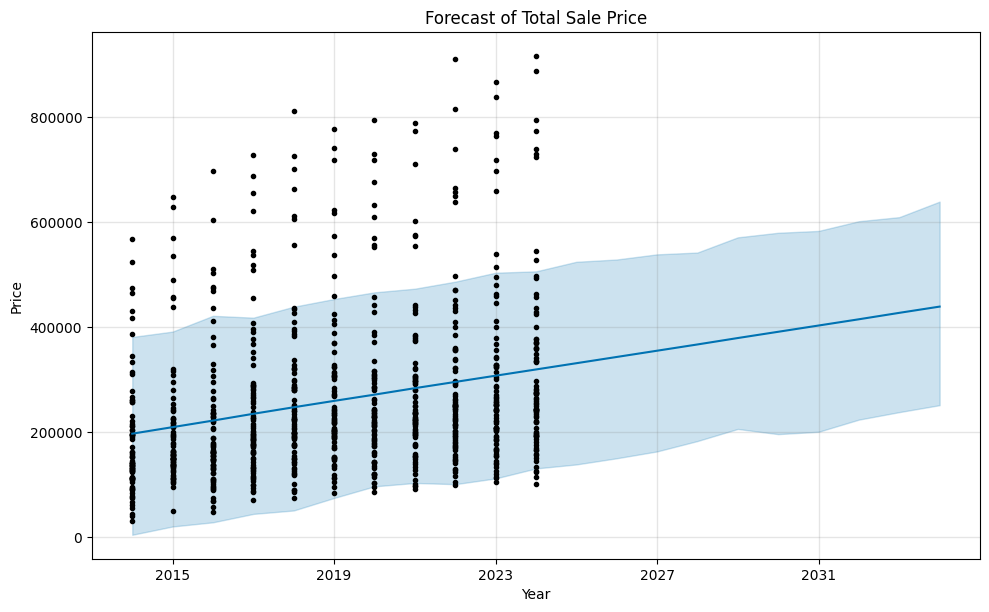

In [61]:
import pandas as pd
from prophet import Prophet
import cmdstanpy

import matplotlib.pyplot as plt

# Prepare the data for Prophet
def prepare_data(df, column):
    df = df[['year', column]].rename(columns={'year': 'ds', column: 'y'})
    df['ds'] = pd.to_datetime(df['ds'], format='%Y')
    return df

# Train and predict using Prophet
def train_and_predict(df, periods, freq='Y'):
    model = Prophet(stan_backend='CMDSTANPY')
    model.fit(df)
    future = model.make_future_dataframe(periods=periods, freq=freq)
    forecast = model.predict(future)
    return model, forecast

# Plot the forecast
def plot_forecast(model, forecast, title):
    fig = model.plot(forecast)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.show()

# Load Data with specified encoding
lloguer_df = pd.read_csv('./portal_dades_bcn_ajuntament/merged_rent_prices_2014_2024.csv', encoding='ISO-8859-1')
compraventa_df = pd.read_csv('./portal_dades_bcn_ajuntament/merged_sale_prices_2014_2024.csv', encoding='ISO-8859-1')

# Prepare data for rent price per m2
lloguer_price_per_m2_df = prepare_data(lloguer_df, 'price_per_m2')
# Prepare data for total rent price
lloguer_total_rent_price_df = prepare_data(lloguer_df, 'total_rent_price')

# Prepare data for sale price per m2
compraventa_price_per_m2_df = prepare_data(compraventa_df, 'price_per_m2')
# Prepare data for total sale price
compraventa_total_sale_price_df = prepare_data(compraventa_df, 'total_sale_price')

# Train and predict for rent price per m2
model_rent_price_per_m2, forecast_rent_price_per_m2 = train_and_predict(lloguer_price_per_m2_df, periods=10)
plot_forecast(model_rent_price_per_m2, forecast_rent_price_per_m2, 'Forecast of Rent Price per m2')

# Train and predict for total rent price
model_total_rent_price, forecast_total_rent_price = train_and_predict(lloguer_total_rent_price_df, periods=10)
plot_forecast(model_total_rent_price, forecast_total_rent_price, 'Forecast of Total Rent Price')

# Train and predict for sale price per m2
model_sale_price_per_m2, forecast_sale_price_per_m2 = train_and_predict(compraventa_price_per_m2_df, periods=10)
plot_forecast(model_sale_price_per_m2, forecast_sale_price_per_m2, 'Forecast of Sale Price per m2')

# Train and predict for total sale price
model_total_sale_price, forecast_total_sale_price = train_and_predict(compraventa_total_sale_price_df, periods=10)
plot_forecast(model_total_sale_price, forecast_total_sale_price, 'Forecast of Total Sale Price')

In [62]:
# Python
from prophet.diagnostics import cross_validation, performance_metrics

# Cross-validate with initial 3 years, horizon 1 year
df_cv = cross_validation(model_rent_price_per_m2, initial='1095 days', period='180 days', horizon='365 days')
df_p = performance_metrics(df_cv)
print(df_p.head())

  0%|          | 0/13 [00:00<?, ?it/s]

21:02:51 - cmdstanpy - INFO - Chain [1] start processing
21:02:51 - cmdstanpy - INFO - Chain [1] done processing
21:02:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:02:51 - cmdstanpy - INFO - Chain [1] start processing
21:02:52 - cmdstanpy - INFO - Chain [1] done processing
21:02:53 - cmdstanpy - INFO - Chain [1] start processing
21:02:53 - cmdstanpy - INFO - Chain [1] done processing
21:02:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:02:53 - cmdstanpy - INFO - Chain [1] start processing
21:02:54 - cmdstanpy - INFO - Chain [1] done processing
21:02:54 - cmdstanpy - INFO - Chain [1] start processing
21:02:54 - cmdstanpy - INFO - Chain [1] done processing
21:02:54 - cmdstanpy - INFO - Chain [1] start processing
21:02:54 - cmdstanpy - INFO - Chain [1] done processing
21:02:54 -

   horizon       mse      rmse       mae      mape     mdape     smape  \
0 159 days  4.768286  2.183641  1.669506  0.146959  0.110388  0.132139   
1 164 days  4.031247  2.007796  1.516348  0.129559  0.088097  0.118082   
2 170 days  5.661329  2.379355  1.817789  0.170357  0.120205  0.144635   
3 175 days  6.137719  2.477442  1.934645  0.157490  0.106148  0.148310   
4 180 days  7.743282  2.782675  2.238202  0.150100  0.144681  0.154953   

   coverage  
0  0.830312  
1  0.858255  
2  0.820378  
3  0.768044  
4  0.671985  


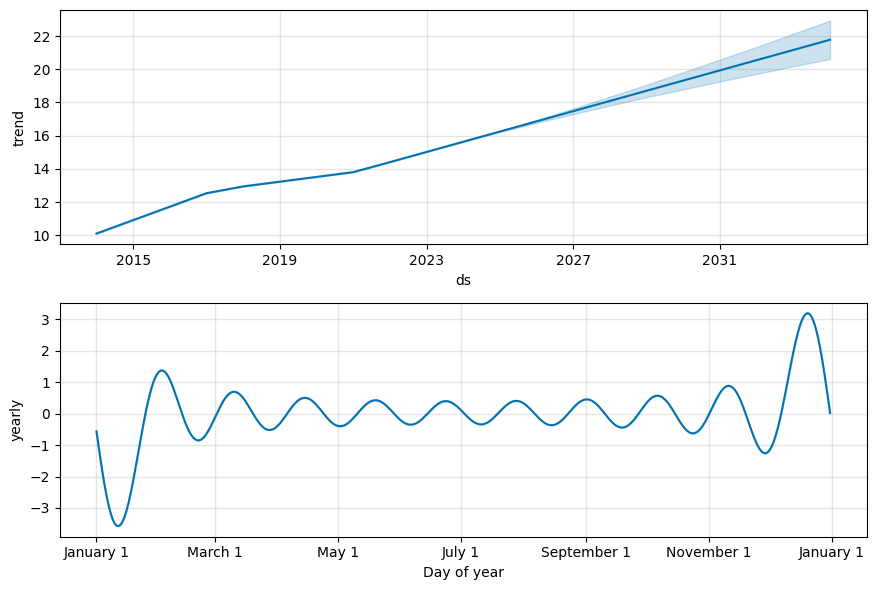

In [63]:
# Python
model_rent_price_per_m2.plot_components(forecast_rent_price_per_m2)
plt.show()

21:02:58 - cmdstanpy - INFO - Chain [1] start processing
21:02:58 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\oriol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


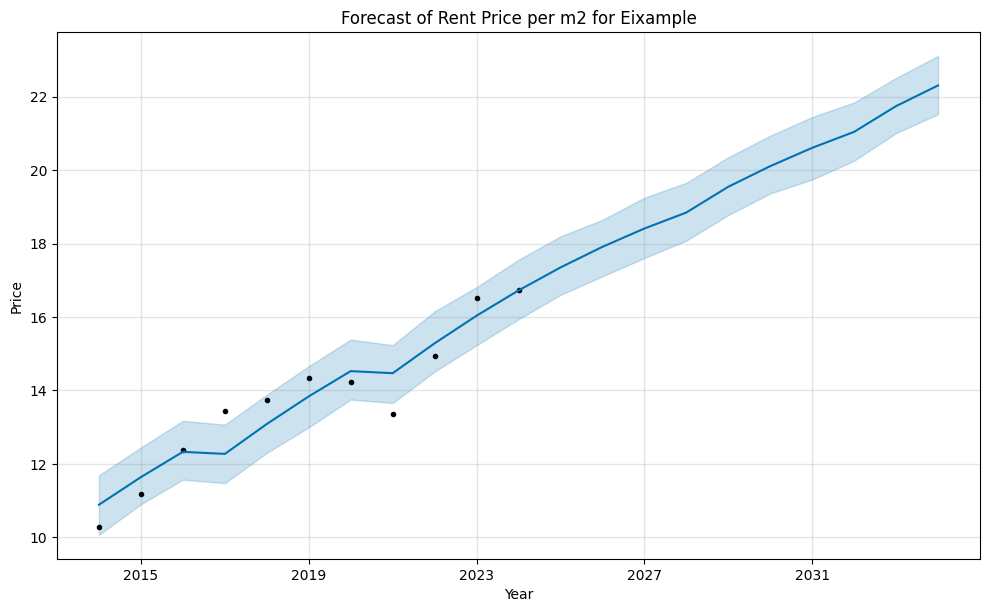

In [64]:
# Python
# Filter data for a specific 'Barri'
Districte_name = 'Eixample'
barri_df = lloguer_df[(lloguer_df['Tipus de territori'] == 'Districte') & (lloguer_df['Territori'] == Districte_name)]

# Prepare data for Prophet
barri_price_per_m2_df = prepare_data(barri_df, 'price_per_m2')

# Train and predict using Prophet
model_barri_price_per_m2, forecast_barri_price_per_m2 = train_and_predict(barri_price_per_m2_df, periods=10)

# Plot the forecast
plot_forecast(model_barri_price_per_m2, forecast_barri_price_per_m2, f'Forecast of Rent Price per m2 for {Districte_name}')

21:02:59 - cmdstanpy - INFO - Chain [1] start processing
21:02:59 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\oriol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


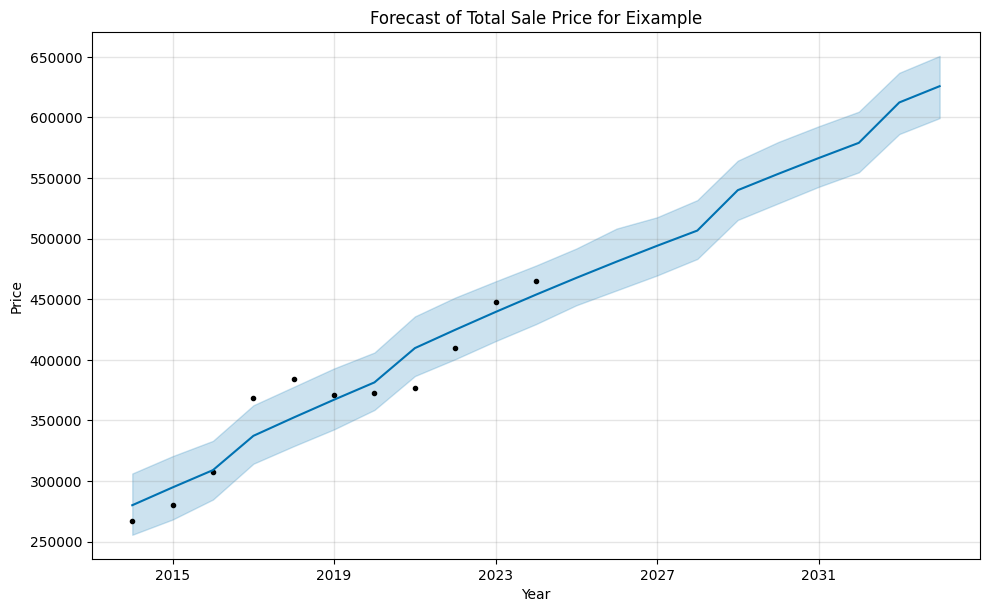

In [65]:
#now for total sale price for district Eixample

# Filter data for a specific 'Barri'
Districte_name = 'Eixample'
barri_df = compraventa_df[(compraventa_df['Tipus de territori'] == 'Districte') & (compraventa_df['Territori'] == Districte_name)]

# Prepare data for Prophet
barri_total_sale_price_df = prepare_data(barri_df, 'total_sale_price')

# Train and predict using Prophet

model_barri_total_sale_price, forecast_barri_total_sale_price = train_and_predict(barri_total_sale_price_df, periods=10)

# Plot the forecast

plot_forecast(model_barri_total_sale_price, forecast_barri_total_sale_price, f'Forecast of Total Sale Price for {Districte_name}')



21:02:59 - cmdstanpy - INFO - Chain [1] start processing
21:02:59 - cmdstanpy - INFO - Chain [1] done processing
21:02:59 - cmdstanpy - INFO - Chain [1] start processing
21:03:00 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\oriol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


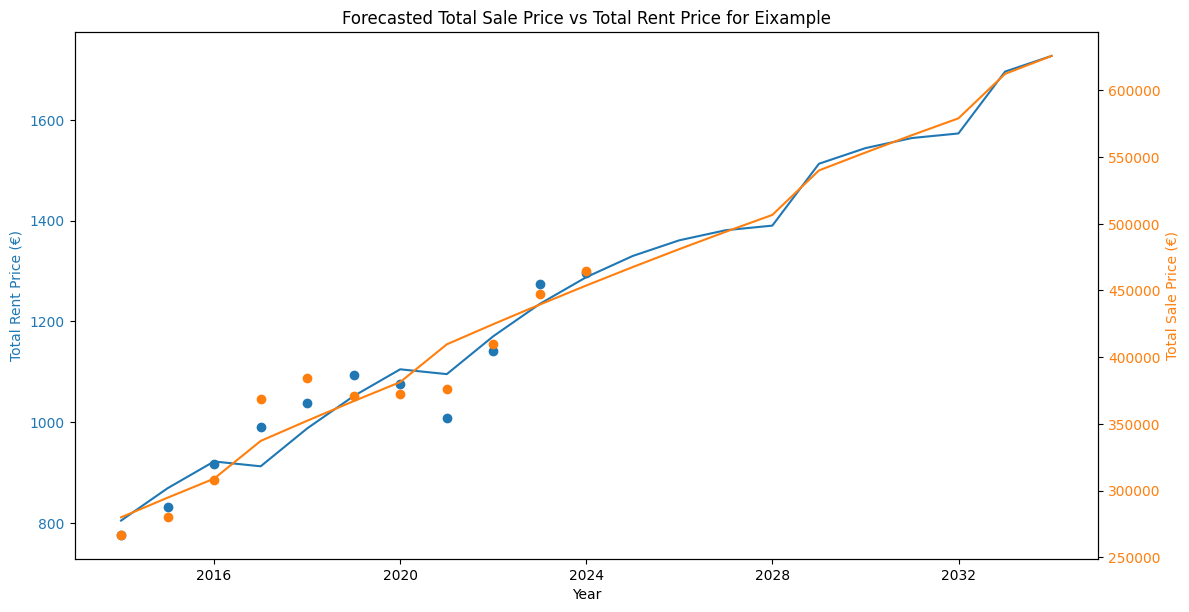

In [66]:
# Filter data for 'Eixample' district
eixample_rent_df = lloguer_df[(lloguer_df['Tipus de territori'] == 'Districte') & (lloguer_df['Territori'] == 'Eixample')]
eixample_sale_df = compraventa_df[(compraventa_df['Tipus de territori'] == 'Districte') & (compraventa_df['Territori'] == 'Eixample')]

# Prepare data for Prophet
def prepare_data(df, column):
    df = df[['year', column]].rename(columns={'year': 'ds', column: 'y'})
    df['ds'] = pd.to_datetime(df['ds'], format='%Y')
    return df

eixample_rent_data = prepare_data(eixample_rent_df, 'total_rent_price')
eixample_sale_data = prepare_data(eixample_sale_df, 'total_sale_price')

# Train Prophet models
from prophet import Prophet

model_rent = Prophet()
model_rent.fit(eixample_rent_data)

model_sale = Prophet()
model_sale.fit(eixample_sale_data)

# Create future dataframe
future = model_rent.make_future_dataframe(periods=10, freq='Y')

# Make predictions
forecast_rent = model_rent.predict(future)
forecast_sale = model_sale.predict(future)


# Plot forecasts with dual y-axes
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Rent Price (€)', color=color)
ax1.plot(forecast_rent['ds'], forecast_rent['yhat'], label='Forecasted Total Rent Price', color=color)
ax1.scatter(eixample_rent_data['ds'], eixample_rent_data['y'], color=color, marker='o', label='Historical Total Rent Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Total Sale Price (€)', color=color)
ax2.plot(forecast_sale['ds'], forecast_sale['yhat'], label='Forecasted Total Sale Price', color=color)
ax2.scatter(eixample_sale_data['ds'], eixample_sale_data['y'], color=color, marker='o', label='Historical Total Sale Price')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Forecasted Total Sale Price vs Total Rent Price for Eixample')
plt.show()